# IFN for Classification and Object Recognition

Ideal Flow Network (IFN) can be used for Machine Learning, Data Science and Artificial Intelligence. In this tutorial, you can see how we can use IFN for Classification of data table, Text processing and Image Processing. I demonstrate below that IFN can be also used as Generative AI.

# Classification of Data Table (Supervised Learning)
Classification is a type of supervised learning where the algorithm is trained on labeled data to predict the output.
The goal of classification is to assign a class label to a new, unseen instance based on the patterns.

## Data Preparation

You can load your own data file using the following function.

In [1]:
def loadFile(filename):
    f = open(filename,'r',encoding="utf-8")
    text=f.read()
    f.close()
    return text

In [2]:
table_data = [['Give Birth', 'Lay Eggs', 'Can Fly', 'Live in Water', 'Have Legs', 'Class'],
 ['yes', 'no', 'no', 'no', 'yes', 'mammals'],
 ['no', 'yes', 'no', 'no', 'no', 'non-mammals'],
 ['no', 'yes', 'no', 'yes', 'no', 'non-mammals'],
 ['yes', 'no', 'no', 'yes', 'no', 'mammals'],
 ['no', 'yes', 'no', 'sometimes', 'yes', 'non-mammals'],
 ['no', 'yes', 'no', 'no', 'yes', 'non-mammals'],
 ['yes', 'no', 'yes', 'no', 'yes', 'mammals'],
 ['no', 'yes', 'yes', 'no', 'yes', 'non-mammals'],
 ['yes', 'no', 'no', 'no', 'yes', 'mammals'],
 ['yes', 'no', 'no', 'yes', 'no', 'non-mammals'],
 ['no', 'yes', 'no', 'sometimes', 'yes', 'non-mammals'],
 ['no', 'yes','no', 'sometimes', 'yes', 'non-mammals'],
 ['yes', 'no', 'no', 'no', 'yes', 'mammals'],
 ['no', 'yes', 'no', 'yes', 'no', 'non-mammals'],
 ['no', 'yes', 'no', 'sometimes', 'yes', 'non-mammals'],
 ['no', 'yes', 'no', 'no', 'yes', 'non-mammals'],
 ['no', 'yes', 'no', 'no' ,'yes', 'mammals'],
 ['no', 'yes', 'yes', 'no','yes', 'non-mammals'],
 ['yes', 'no', 'no', 'yes', 'no', 'mammals'],
 ['no', 'yes', 'yes', 'no', 'yes', 'non-mammals']]
table_data

[['Give Birth', 'Lay Eggs', 'Can Fly', 'Live in Water', 'Have Legs', 'Class'],
 ['yes', 'no', 'no', 'no', 'yes', 'mammals'],
 ['no', 'yes', 'no', 'no', 'no', 'non-mammals'],
 ['no', 'yes', 'no', 'yes', 'no', 'non-mammals'],
 ['yes', 'no', 'no', 'yes', 'no', 'mammals'],
 ['no', 'yes', 'no', 'sometimes', 'yes', 'non-mammals'],
 ['no', 'yes', 'no', 'no', 'yes', 'non-mammals'],
 ['yes', 'no', 'yes', 'no', 'yes', 'mammals'],
 ['no', 'yes', 'yes', 'no', 'yes', 'non-mammals'],
 ['yes', 'no', 'no', 'no', 'yes', 'mammals'],
 ['yes', 'no', 'no', 'yes', 'no', 'non-mammals'],
 ['no', 'yes', 'no', 'sometimes', 'yes', 'non-mammals'],
 ['no', 'yes', 'no', 'sometimes', 'yes', 'non-mammals'],
 ['yes', 'no', 'no', 'no', 'yes', 'mammals'],
 ['no', 'yes', 'no', 'yes', 'no', 'non-mammals'],
 ['no', 'yes', 'no', 'sometimes', 'yes', 'non-mammals'],
 ['no', 'yes', 'no', 'no', 'yes', 'non-mammals'],
 ['no', 'yes', 'no', 'no', 'yes', 'mammals'],
 ['no', 'yes', 'yes', 'no', 'yes', 'non-mammals'],
 ['yes', 'no', 

In [3]:
# Extract the first row (variable names)
variable_names = table_data[0][:-1]
variable_names

['Give Birth', 'Lay Eggs', 'Can Fly', 'Live in Water', 'Have Legs']

In [4]:
# Extract X (features) not include label
X = [row[:-1] for row in table_data[1:]]
X

[['yes', 'no', 'no', 'no', 'yes'],
 ['no', 'yes', 'no', 'no', 'no'],
 ['no', 'yes', 'no', 'yes', 'no'],
 ['yes', 'no', 'no', 'yes', 'no'],
 ['no', 'yes', 'no', 'sometimes', 'yes'],
 ['no', 'yes', 'no', 'no', 'yes'],
 ['yes', 'no', 'yes', 'no', 'yes'],
 ['no', 'yes', 'yes', 'no', 'yes'],
 ['yes', 'no', 'no', 'no', 'yes'],
 ['yes', 'no', 'no', 'yes', 'no'],
 ['no', 'yes', 'no', 'sometimes', 'yes'],
 ['no', 'yes', 'no', 'sometimes', 'yes'],
 ['yes', 'no', 'no', 'no', 'yes'],
 ['no', 'yes', 'no', 'yes', 'no'],
 ['no', 'yes', 'no', 'sometimes', 'yes'],
 ['no', 'yes', 'no', 'no', 'yes'],
 ['no', 'yes', 'no', 'no', 'yes'],
 ['no', 'yes', 'yes', 'no', 'yes'],
 ['yes', 'no', 'no', 'yes', 'no'],
 ['no', 'yes', 'yes', 'no', 'yes']]

In [5]:
# Extract y (labels)
y = [row[-1] for row in table_data[1:]]
y

['mammals',
 'non-mammals',
 'non-mammals',
 'mammals',
 'non-mammals',
 'non-mammals',
 'mammals',
 'non-mammals',
 'mammals',
 'non-mammals',
 'non-mammals',
 'non-mammals',
 'mammals',
 'non-mammals',
 'non-mammals',
 'non-mammals',
 'mammals',
 'non-mammals',
 'mammals',
 'non-mammals']

For classfiying data table, since the values of the variables can be the same for different variables (e.g. 'Give Birth:yes' is not equal to 'Have Legs:yes'), we need to include variable name into the value (Variable:Value). This can be done by the `prepareDataTable` method. 

In [6]:
import IdealFlow.TableProcessing as tblproc     # import package.module as alias

tp = tblproc.TableProcessing() 
X, y = tp.prepareDataTable(table_data)
X

[['Give Birth:yes',
  'Lay Eggs:no',
  'Can Fly:no',
  'Live in Water:no',
  'Have Legs:yes'],
 ['Give Birth:no',
  'Lay Eggs:yes',
  'Can Fly:no',
  'Live in Water:no',
  'Have Legs:no'],
 ['Give Birth:no',
  'Lay Eggs:yes',
  'Can Fly:no',
  'Live in Water:yes',
  'Have Legs:no'],
 ['Give Birth:yes',
  'Lay Eggs:no',
  'Can Fly:no',
  'Live in Water:yes',
  'Have Legs:no'],
 ['Give Birth:no',
  'Lay Eggs:yes',
  'Can Fly:no',
  'Live in Water:sometimes',
  'Have Legs:yes'],
 ['Give Birth:no',
  'Lay Eggs:yes',
  'Can Fly:no',
  'Live in Water:no',
  'Have Legs:yes'],
 ['Give Birth:yes',
  'Lay Eggs:no',
  'Can Fly:yes',
  'Live in Water:no',
  'Have Legs:yes'],
 ['Give Birth:no',
  'Lay Eggs:yes',
  'Can Fly:yes',
  'Live in Water:no',
  'Have Legs:yes'],
 ['Give Birth:yes',
  'Lay Eggs:no',
  'Can Fly:no',
  'Live in Water:no',
  'Have Legs:yes'],
 ['Give Birth:yes',
  'Lay Eggs:no',
  'Can Fly:no',
  'Live in Water:yes',
  'Have Legs:no'],
 ['Give Birth:no',
  'Lay Eggs:yes',
  'Ca

## Classification Data Table

In [7]:
accuracy = tp.ifnc.fit(X, y)
print("Accuracy:", accuracy)

Accuracy: 0.9


In [8]:
tp.ifnc.IFNs


{'mammals': mammals, 'non-mammals': non-mammals}

mammals : {'#z#': {'i2': 6, 'c9': 1}, 'i2': {'g4': 6}, 'g4': {'b2': 5, 'd0': 1}, 'b2': {'b9': 4, 'i': 2}, 'b9': {'f7': 5}, 'f7': {'#z#': 5}, 'i': {'i1': 2}, 'i1': {'#z#': 2}, 'd0': {'b9': 1}, 'c9': {'c5': 1}, 'c5': {'b2': 1}}


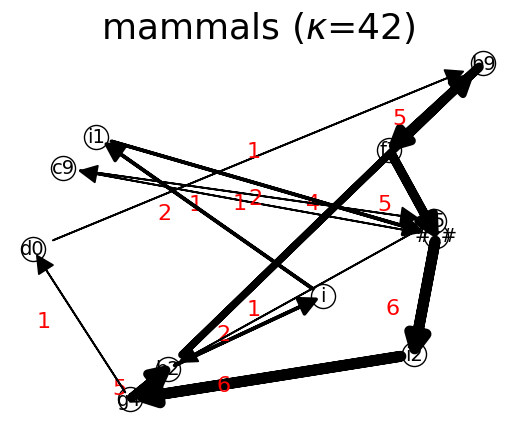

non-mammals : {'#z#': {'c9': 12, 'i2': 1}, 'c9': {'c5': 12}, 'c5': {'b2': 9, 'd0': 3}, 'b2': {'b9': 3, 'i': 3, 'h5': 4}, 'b9': {'i1': 1, 'f7': 5}, 'i1': {'#z#': 4}, 'i': {'i1': 3}, 'h5': {'f7': 4}, 'f7': {'#z#': 9}, 'd0': {'b9': 3}, 'i2': {'g4': 1}, 'g4': {'b2': 1}}


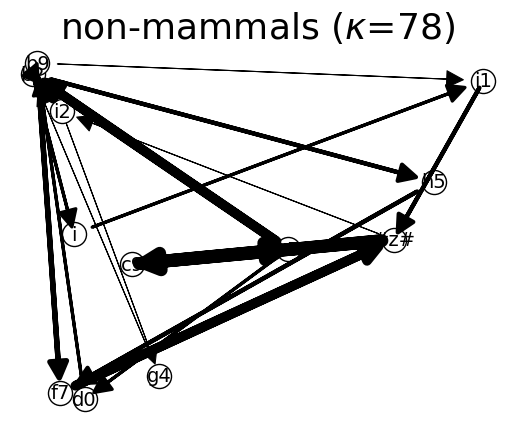

In [9]:
for name,ifn in tp.ifnc.IFNs.items():
    print(name,':',ifn)
    ifn.show(layout="Random") 

## Prediction

In [10]:
print("\nprediction =",tp.ifnc.predict(X),'\n','\ntrue y =',y,'\n')


prediction = (['mammals', 'non-mammals', 'non-mammals', 'mammals', 'non-mammals', 'non-mammals', 'mammals', 'non-mammals', 'mammals', 'mammals', 'non-mammals', 'non-mammals', 'mammals', 'non-mammals', 'non-mammals', 'non-mammals', 'non-mammals', 'non-mammals', 'mammals', 'non-mammals'], [0.6819721810585313, 1.0, 0.6363114145052776, 0.6856279738081407, 1.0, 0.5796475860536682, 1.0, 1.0, 0.6819721810585313, 0.6856279738081407, 1.0, 1.0, 0.6819721810585313, 0.6363114145052776, 1.0, 0.5796475860536682, 0.5796475860536682, 1.0, 0.6856279738081407, 1.0]) 
 
true y = ['mammals' 'non-mammals' 'non-mammals' 'mammals' 'non-mammals'
 'non-mammals' 'mammals' 'non-mammals' 'mammals' 'non-mammals'
 'non-mammals' 'non-mammals' 'mammals' 'non-mammals' 'non-mammals'
 'non-mammals' 'mammals' 'non-mammals' 'mammals' 'non-mammals'] 



## Random Generation of Data

This is an inverse function of the data. Knowing the class category output, get back the possible random input.

In [11]:
import random

category=random.choice(y)
tr=tp.ifnc.generate(category)
print('trajectory for',category,":\n",tr)

trajectory for non-mammals :
 ['Give Birth:no', 'Lay Eggs:yes', 'Can Fly:no', 'Live in Water:sometimes', 'Have Legs:yes']


# IFN for Text Processing



In [ ]:
# import nltk

# Data Preparation

In [13]:
import urllib.request as urllib2
from bs4 import BeautifulSoup
url='http://www.gutenberg.org/cache/epub/13166/pg13166.txt' # Psalm of David
page = urllib2.urlopen(url).read().decode('utf8')
soup = BeautifulSoup(page,"lxml")
myText=soup.get_text()
start_text='THE Psalms of David,'
end_text='While faith adores.'
start=myText.find(start_text) # 21677
end=myText.find(end_text) # 364228
print('start:',start,'end',end)
psalm=myText[start:end] # only the main content of the Psalm of David
# myText[:100]
psalm

ModuleNotFoundError: No module named 'bs4'

## Tokenization

To separate the text or sentences into words with or without puctuation.

In [ ]:
# sentences = nltk.sent_tokenize(psalm)
words = nltk.word_tokenize(psalm)                            # Tokenization with punctuation for text analysis and synthesis/generation. 
words =nltk.tokenize.RegexpTokenizer(r'\w+').tokenize(psalm) # Tokenization without punctuation for text analysis.
words[:12]

## Text Processing using IFN

In [ ]:
from IdealFlow.TextProcessing import TextProcessing
category = 'Psalm'
tp = TextProcessing()
X,y=tp.prepareTextInput(psalm,category)       # prepare data for training
print(X,y)
print('accuracy = ',tp.ifnc.fit(X, y),'\n')  # training the iFN
tp.ifnc.save()                               # saved the IFN


In [ ]:
tp.ifnc.load()
sentences=""
for i in range(15):
    tr=tp.ifnc.generate(category)
    sentence=tp.tokens2Sentence(tr)
    sentences=sentences+" "+ sentence
print(sentences,"\n")

In [ ]:
print(tp.ifnc.IFNs)
tp.ifnc.lut


In [ ]:
for name,ifn in tp.ifnc.IFNs.items():
    print(name,':',ifn)
    ifn.show(layout="Circular")